# Analyze a Data Set

*Maelle Vance - 02/07/2017*

## This data set concerns housing values in suburbs of Boston.

### Attribute Information:

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in \$1000's

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv("../boston_housing_data.csv", sep=",",
                           names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'],
                )

### Finding the median and average home values across all Boston Suburbs in dollars:

In [3]:
median_home_values = housing_data["MEDV"]

In [4]:
median_value_all_suburbs = median_home_values.median() * 1000

In [5]:
median_value_all_suburbs

21200.0

In [6]:
mean_value_all_suburbs = median_home_values.mean() * 1000

In [7]:
mean_value_all_suburbs

22532.806324110676

### Finding the median home value of the suburb with the youngest houses:

In [8]:
newest_suburb = housing_data.loc[housing_data['AGE'] == min(housing_data["AGE"])]

In [9]:
newest_suburb

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
41,0.12744,0.0,6.91,0,0.448,6.77,2.9,5.7209,3,233.0,17.9,385.41,4.84,26.6


In [10]:
median_home_value_newest_suburb = newest_suburb["MEDV"]

In [11]:
median_home_value_newest_suburb.median() * 1000

26600.0

*The median home value in the suburb with the most recent houses (i.e built after 1940) is higher than the overall median house value. We can extrapolate that the suburb with the most recent construction is more expensive.*

### The relationship between per-capita crime rate and the pupil-teacher ratio. Differentiate between whether or not the suburb is bounded by the Charles River.

In [12]:
no_river = housing_data.loc[housing_data["CHAS"] == 0]

In [13]:
no_river_crime_ptratio = pd.DataFrame(no_river, columns = ["CRIM", "PTRATIO"])

In [14]:
plt.scatter(no_river_crime_ptratio["PTRATIO"], no_river_crime_ptratio["CRIM"])

In [15]:
plt.title("Relationship between student/teacher ratio and crime rate per capita, for properties in neighborhood not borded by Charles River")

In [16]:
plt.xlabel("Student Teacher Ratio")
plt.ylabel("crime rate per capita")

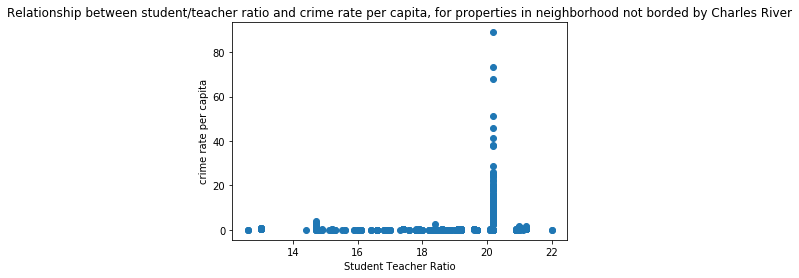

In [17]:
plt.show()

*We can note a spike around 20 students per teacher where the crim rate can go as high a above 88%. This spike is not sustained in higher student/teacher ratios. Ideally we would need to analyze the type of crime and get more data on the suburbs.*

In [18]:
river_bounded = housing_data.loc[housing_data["CHAS"] == 1]

In [19]:
river_bounded_crime_ptratio = pd.DataFrame(river_bounded, columns = ["CRIM", "PTRATIO"])

In [20]:
plt.scatter(river_bounded_crime_ptratio["PTRATIO"], river_bounded_crime_ptratio["CRIM"])
plt.title("Relationship between student/teacher ratio and crime rate per capita, for properties in neighborhood bording the Charles River")
plt.xlabel("Student Teacher Ratio")
plt.ylabel("crime rate per capita")

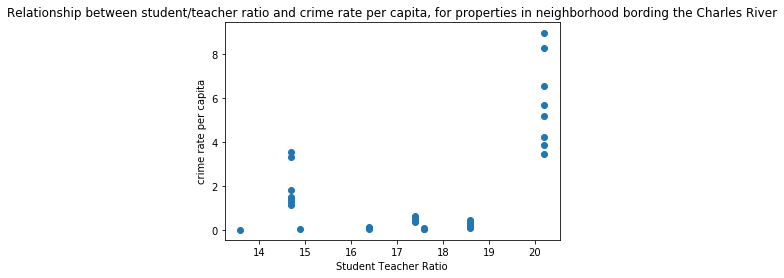

In [21]:
plt.show()

*We can see two spikes in this plot. One just below the 15 student per teacher ration and on above 20 students per teacher ratio. Everything below or in between seems on par. It'd be interesting to get more data on the suburbs with a student teacher ratio between 14 and 15.*

### Relationship between the proportion of black citizens and the distance to employment centers in Boston.

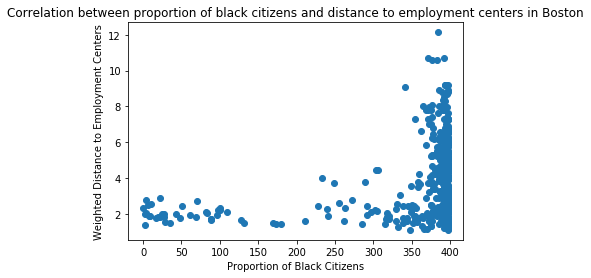

In [22]:
plt.scatter(housing_data["B"], housing_data["DIS"])
plt.title("Correlation between proportion of black citizens and distance to employment centers in Boston")
plt.xlabel("Proportion of Black Citizens")
plt.ylabel("Weighted Distance to Employment Centers")
plt.show()

### Relationship between median value of owner-occupied homes and nitric oxide concentration along with median home value and the proportion of non-retail business

In [23]:
new_set = pd.DataFrame(housing_data, columns = ["MEDV", "NOX", "INDUS"])

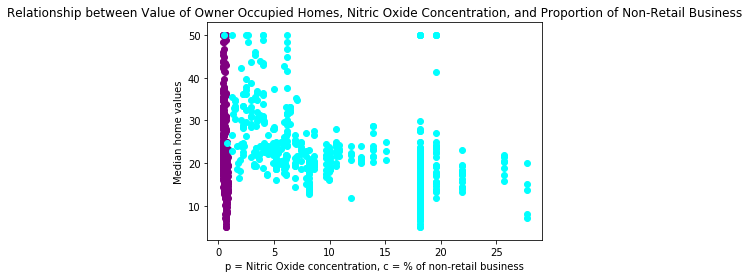

In [24]:
plt.scatter(housing_data["NOX"], housing_data["MEDV"], c="purple")
plt.scatter(housing_data["INDUS"], housing_data["MEDV"], c="cyan")
plt.title("Relationship between Value of Owner Occupied Homes, Nitric Oxide Concentration, and Proportion of Non-Retail Business")
plt.ylabel("Median home values")
plt.xlabel("p = Nitric Oxide concentration, c = % of non-retail business")
plt.show()


*This plot is illegible.*

### What is the full-value property-tax rate per \$10,000 in suburbs with the most newest constructions vs in suburbs with most older houses?

In [25]:
newest_suburb["TAX"]

41    233.0
Name: TAX, dtype: float64

In [26]:
most_older_houses_suburb = housing_data.loc[housing_data['AGE'] == max(housing_data["AGE"])]

In [27]:
len(most_older_houses_suburb)

43

*we notice that there are 43 suburbs with a proportion of proportion of owner-occupied units built prior to 1940.*

*We could get the mean, min and max*

In [28]:
most_older_houses_suburb["TAX"].mean()

565.16279069767438

In [29]:
most_older_houses_suburb["TAX"].max()

666.0

In [30]:
most_older_houses_suburb["TAX"].min()

264.0

The full-value property-tax rate per \$10,000 in the suburb with the most owner occupied houses built after 1940 is **233.0**

In contrast, the mean full-value property rate per \$10,000 in suburbs with 100% owner occupied houses built before 1940 is about **565.16** the minimum is **264** and the maximum is **666**